# EXAMPLE CODE FORMAT

**Instructions:** You will process and analyze a large data set that contains crimes reported in the city of Chicago from 2018 to 2021.

To load the data set and get the *crimes* dataframe correctly configured, execute the cells with the code provided in this notebook. This could take a few minutes after you start the execution of the code cells.

Once the *crimes* dataframe has been setup proceed to obtain 2 meaningful data analysis results from processing the *crimes* dataframe. Specific cells have been provided for you to describe the results of each of your data analysis procedures. You can add as many code cells as you want to complete each of your analysis and I also recommend that you add some explanatory cells (use Markdown) to provide some additional text with explanations of your analysis.


In [1]:
#EXECUTE THIS CELL to setup the modules you need
%matplotlib inline
#%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining location of dataset 
filepath="/opt/datasets/ist652/Crimes/crimes_2018_2021.csv"

In [3]:
#EXECUTE THIS CELL to load the dataset into your environment - THIS WILL TAKE 3 TO 5 MINUTES - be patient
# a security warning will appear. You can ignore it.
crimes=pd.read_csv(filepath,parse_dates=[2], index_col=[0])

In [4]:
crimes.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
11645648,JC212959,2018-01-01 08:00:00,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2515,...,30.0,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33.0,14.0,08A,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
11645557,JC212685,2018-04-01 00:01:00,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,631,...,6.0,44.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,36.0,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN


In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946893 entries, 11646166 to 12836940
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Case Number           946893 non-null  object        
 1   Date                  946893 non-null  datetime64[ns]
 2   Block                 946893 non-null  object        
 3   IUCR                  946893 non-null  object        
 4   Primary Type          946893 non-null  object        
 5   Description           946893 non-null  object        
 6   Location Description  942727 non-null  object        
 7   Arrest                946893 non-null  bool          
 8   Domestic              946893 non-null  bool          
 9   Beat                  946893 non-null  int64         
 10  District              946893 non-null  int64         
 11  Ward                  946854 non-null  float64       
 12  Community Area        946892 non-null  float64       


### Insights from the dataframe

- The DataFrame contains **946,893 rows** (entries) and **21 columns** in total, representing various attributes of crime incidents.
- Majority of the columns have **946,893 non-null** entries. However, the `Location Description`, `X Coordinate`, `Y Coordinate`, `Latitude`, `Longitude`, and `Location` columns have fewer non-null entries, suggesting missing values. From the above info() method, we can see that `Location Description` has about **4,166 missing entries** while `X Coordinate`, `Y Coordinate`, `Latitude`, `Longitude`, and `Location` have about **12,859 missing entries**.

- Additionally, the dataset includes a variety of data types:
  - `object`: Found in most columns and likely represents categorical data or text fields.
  - `datetime64[ns]`: Used for the `Date` column, indicating suitability for time series analysis.
  - `bool`: For `Arrest` and `Domestic`, indicating binary (True/False) data.
  - `int64` and `float64`: For numerical values, such as `Beat`, `District`, `Ward`, `Community Area`, as well as geographical coordinates.

In [6]:
## Data cleaning and subsetting

# Identify key features
crime_features = ["Date", "Primary Type", "Arrest", "Ward", "Longitude", "Latitude", "Year"]

# Subset the Data and drop NA values from Lat and Long
crimes_drop_na = crimes[crime_features].dropna(subset = ["Longitude", "Latitude"])
crimes_drop_na


,Date,Primary Type,Arrest,Ward,Longitude,Latitude,Year
ID,,,,,,,
11431014,2018-08-30 11:50:00,OTHER OFFENSE,True,1.0,-87.667903,41.896063,2018
11458569,2018-09-25 15:45:00,ASSAULT,False,17.0,-87.690706,41.769400,2018
11492590,2018-10-30 16:59:00,BATTERY,True,22.0,-87.725954,41.838706,2018
11514713,2018-11-23 01:30:00,OFFENSE INVOLVING CHILDREN,True,29.0,-87.773788,41.896551,2018
11420858,2018-08-21 01:40:00,CRIMINAL SEXUAL ASSAULT,False,44.0,-87.636707,41.934679,2018
...,...,...,...,...,...,...,...
12560079,2021-01-01 09:18:00,HUMAN TRAFFICKING,False,36.0,-87.751149,41.921447,2021
12360261,2021-05-08 13:01:00,ARSON,True,7.0,-87.569878,41.751174,2021
12448468,2021-08-09 20:00:00,OFFENSE INVOLVING CHILDREN,False,3.0,-87.627302,41.862273,2021


In [8]:
# Convert Year to a categorical variable
crimes_cat_year = crimes_drop_na.copy()
crimes_cat_year['Year'] = crimes_drop_na['Year'].astype('category')
crimes_cat_year['Year']


ID
11431014    2018
11458569    2018
11492590    2018
11514713    2018
11420858    2018
            ... 
12560079    2021
12360261    2021
12448468    2021
12562229    2021
26009       2021
Name: Year, Length: 934034, dtype: category
Categories (4, int64): [2018, 2019, 2020, 2021]

In [9]:
# Drop outliers in the Lat and Long data
crimes_cleaned = crimes_cat_year[(crimes_cat_year["Latitude"] > 41.5) & (crimes_cat_year["Longitude"] > -88)]
crimes_cleaned


,Date,Primary Type,Arrest,Ward,Longitude,Latitude,Year
ID,,,,,,,
11431014,2018-08-30 11:50:00,OTHER OFFENSE,True,1.0,-87.667903,41.896063,2018
11458569,2018-09-25 15:45:00,ASSAULT,False,17.0,-87.690706,41.769400,2018
11492590,2018-10-30 16:59:00,BATTERY,True,22.0,-87.725954,41.838706,2018
11514713,2018-11-23 01:30:00,OFFENSE INVOLVING CHILDREN,True,29.0,-87.773788,41.896551,2018
11420858,2018-08-21 01:40:00,CRIMINAL SEXUAL ASSAULT,False,44.0,-87.636707,41.934679,2018
...,...,...,...,...,...,...,...
12560079,2021-01-01 09:18:00,HUMAN TRAFFICKING,False,36.0,-87.751149,41.921447,2021
12360261,2021-05-08 13:01:00,ARSON,True,7.0,-87.569878,41.751174,2021
12448468,2021-08-09 20:00:00,OFFENSE INVOLVING CHILDREN,False,3.0,-87.627302,41.862273,2021


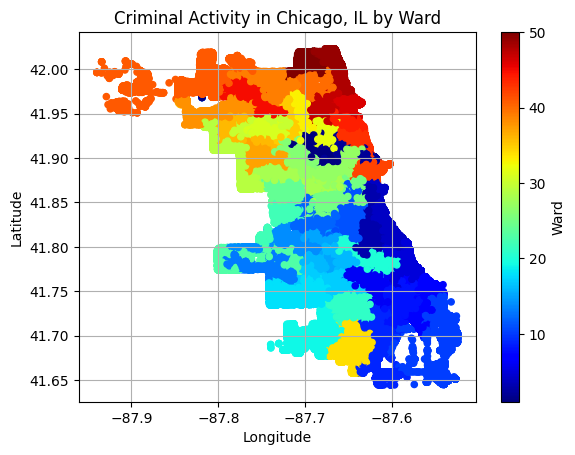

In [11]:
## Visualizing the data from Chicago, broken down by wards
crimes_cleaned.plot(kind = "scatter", x = "Longitude", y = "Latitude", c = "Ward", cmap = "jet", grid = True)
plt.title("Criminal Activity in Chicago, IL by Ward")
plt.show()

### Data cleaning and subsetting interpretation

Here, we selected specific attributes based on what we think is relevant for analysis, such as the date of the crime, type of crime, whether an arrest was made, the ward where the crime occurred, geographical coordinates, and the year. Next the DataFrame `crimes` is subset to include only the selected features. Additionally, any rows with missing values in the `Longitude` and `Latitude` columns are dropped so visualization is complete.

We also converted the `Year` column from numerical to categorical data type, which we believe may help in certain types of analysis or visualization where the year is treated as a discrete variable rather than a continuous one.
The data is further cleaned by filtering out rows with `Latitude` less than 41.5 and `Longitude` greater than -88 to remove location outliers. This filtering is done as majority of the latitude and longitude data lie between this range. Anything outside this data range seemed to be an outlier.

### Generating scatterplot
A scatter plot is finally generated using the cleaned data, with `Longitude` on the x-axis and `Latitude` on the y-axis, to provide a geographical representation of crime incidents. The `Ward` column is used to color-code the data points, with the color intensity determined by the ward's numeric value. The colormap 'jet' is specified, which is a spectrum from blue (low crime activity) to red (high crime activity). The presence of a grid aids in better readability and location pinpointing on the plot. 

# Code for data analysis 1

You can place the code for your first data analysis result in this section. Add as many code cells as you need.

Primary Type
NARCOTICS            39022
BATTERY              33190
WEAPONS VIOLATION    19014
THEFT                16726
ASSAULT              11227
Name: count, dtype: int64


<Axes: >

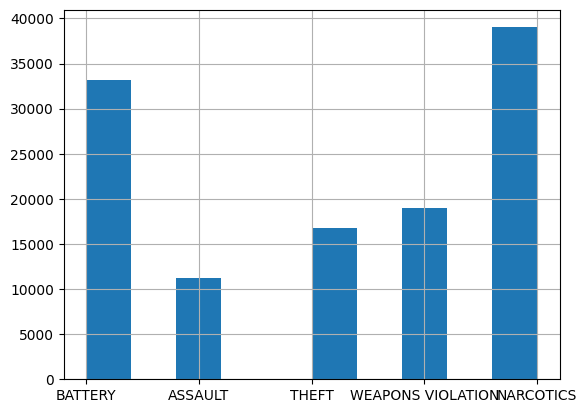

In [8]:
# What types of crimes most frequently lead to an arrest?
crimes_1 = crimes_cleaned[crimes_cleaned["Arrest"] == True]
print(crimes_1["Primary Type"].value_counts()[:5])

# Subset for the top 5 crimes
crimes_top_5 = crimes_1[(crimes_1["Primary Type"] == "NARCOTICS") | 
                        (crimes_1["Primary Type"] == "BATTERY")| 
                        (crimes_1["Primary Type"] == "WEAPONS VIOLATION") | 
                        (crimes_1["Primary Type"] == "THEFT") | 
                        (crimes_1["Primary Type"] == "ASSAULT")]

# Create a bar chart for those variables
crimes_top_5["Primary Type"].hist()

## Description of data analysis result 1

Use the next cell to describe your data analysis result 1

For this first analysis, we wanted to look at what the most common types of crime in Chicago, IL that lead to an arrest.


Firstly, we create a subset of the crimes_cleaned DataFrame, named crimes_1, which contains only the rows where an arrest has been made (Arrest column equals True). Then, we calculate the frequency of each crime type (Primary Type) within this arrested subset and prints the top 5 most frequent crime types using **value_counts()**. Next, we further filter the crimes_1 DataFrame to create a new subset called crimes_top_5, which only includes the rows corresponding to the top 5 crime types that most frequently lead to an arrest. 


In the histogram, the x-axis typically represent the category of crimes, and the y-axis would represent the count of arrests. Each bar's length visually communicates the number of arrests related to each crime type. We can infer that **narcotics** with a count of **39022** where the most common, followed by **battery** with a count of **33190** and **weapons** violations with a count of **19014**.

# Code for data analysis 2

You can place the code for your second data analysis result in this section. Add as many code cells as you need.

Date
2019    14995
2018    12797
2020     7269
2021     4089
Name: count, dtype: int64


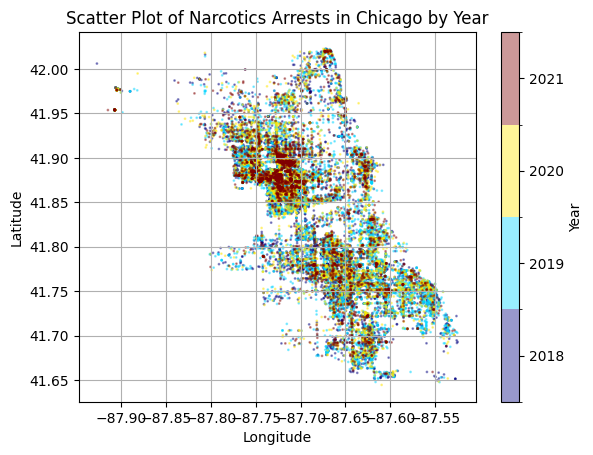

In [9]:
## Analysis question 2 
# Which year had the most narcotics related crimes?

# Create a new variable for narcotics
crimes_2 = crimes_cleaned[(crimes_cleaned["Primary Type"] == "NARCOTICS") & (crimes_cleaned["Arrest"] == True)]

# See which year had the narcotics arrests by count
crimes_2_counts = crimes_cleaned[crimes_cleaned["Primary Type"] == "NARCOTICS"]["Date"].dt.year
print(crimes_2_counts.value_counts())

# Visualize the distribution
crimes_2.plot(kind = "scatter", x = "Longitude", y = "Latitude", c = "Year", cmap = "jet", 
                    s = 1, alpha = 0.4, grid = True)
plt.title('Scatter Plot of Narcotics Arrests in Chicago by Year')
plt.show()

## Description of data analysis result 2

Use the next cell to describe your data analysis result 2

Following up on the question from part 1, we wanted to break down the most common type of crime that led to an arrest. The above code provides an analysis to understand the frequency and distribution of **narcotics** related arrests and see which years they occured in, and where the arrests occured. **2019** and **2018** had similar amounts of narcotics arrests, with **14,995** and **12,797** respectively, but far fewer total arrests in **2020** and **2021**. 


From the scatter plot, we can visualize the arrests geographically and temporally, showing where the arrests occurred within the city and how their frequency changes over the years. Each point represents an arrest, with the color indicating the year.  there is a high concentration of narcotics arrests in the northwestern portion of Chicago in 2021, and more arrests in the southern portion in 2019. Both 2020 and 2018 narcotics arrests appear more evenly distributed.